# Определение перспективного тарифа для телеком компании

Чтобы скорректировать рекламный бюджет компании «Мегалайн», коммерческий департамент хочет понять, какой тариф приносит больше денег: <b>«Смарт»</b> или <b>«Ультра»</b>.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание тарифов

#### Тариф «Смарт»

<div style="border:solid black 1px; padding: 20px">
    
   1. Ежемесячная плата: 550 рублей
   2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета:

    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

</div>

#### Тариф «Ультра»

<div style="border:solid black 1px; padding: 20px">
    
   1. Ежемесячная плата: 1950 рублей
   2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   3. Стоимость услуг сверх тарифного пакета:

    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей
    
</div>

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## План работы



<h3 style="color:black; margin-bottom:20px">Шаг 1. Откройте файл с данными и изучите общую информацию</h3> 

<h3 style="color:black; margin-bottom:20px">Шаг 2. Подготовьте данные</h3> 

<h3 style="color:black; margin-bottom:20px">Шаг 3. Проанализируйте данные</h3>   

<h3 style="color:black; margin-bottom:20px">Шаг 4. Проверьте гипотезы</h3>
    
<h3 style="color:black; margin-bottom:20px">Шаг 5. Напишите общий вывод</h3>


## Описание данных

Таблица <code>users</code> (информация о пользователях)

Таблица <code>calls</code> (информация о звонках)

Таблица <code>messages</code> (информация о сообщениях)

Таблица <code>internet</code> (информация об интернет-сессиях)

Таблица <code>tariffs</code> (информация о тарифах)
___

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import numpy as np

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [6]:
pd.DatetimeIndex(calls['call_date']).month

Int64Index([ 7,  8,  6,  9, 12, 11, 10,  8,  9,  8,
            ...
            10, 12, 12, 10, 12, 12, 10, 11, 10, 12],
           dtype='int64', name='call_date', length=202607)

#### В таблице users представлена общая информация о пользователях тарифа.

In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [6]:
users['churn_date'].value_counts(dropna=False).head()

NaN           462
2018-10-03      2
2018-12-03      2
2018-12-21      2
2018-12-09      2
Name: churn_date, dtype: int64

Много пропусков в churn_date.

#### В таблице calls представлена информация о звонках.

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
calls['duration'].value_counts().head()

0.00    39613
4.49      142
5.50      142
6.15      141
6.38      141
Name: duration, dtype: int64

Очень много звонков длительностью в 0 секунд.

#### В таблице messages представлена информация о сообщениях.

In [10]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


#### В таблице internet представлена информация о интернет-сессиях.

In [12]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
internet['mb_used'].value_counts().head()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64

#### В таблице tariffs представлена информация о тарифах.

In [15]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод:

В данных есть ошибки:
 - столбцы с датой в каждой таблице имеют неверный формат;
 - много звонков с нулевой длительностью;
 - столбец 'Unnamed: 0' в таблице internet совершенно лишний;
 - есть смысл округлить в большую сторону значения длительности звонков и трафика. 

# Шаг 2. Подготовьте данные

Приведем данные к нужным типам. Начнем с даты.

In [17]:
def correct_date(date):
    return (pd.to_datetime(date, format='%Y-%m-%d', errors='coerce'))

In [18]:
# этот код медленно отрабатывает, видимо, из-за большого количества данных 
users['churn_date'] = users['churn_date'].apply(correct_date)
users['reg_date'] = users['reg_date'].apply(correct_date)
calls['call_date'] = calls['call_date'].apply(correct_date)
messages['message_date'] = messages['message_date'].apply(correct_date)
internet['session_date'] = internet['session_date'].apply(correct_date)

Проверим, что получилось.

In [19]:
dates = [users, calls, messages, internet]
for date in dates:
    date.info()
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]


Даты переведены в нужный формат и теперь с ними можно работать.

Проверим, все ли данные за 2018 год.

In [20]:
print('users["churn_date"]\n',users['churn_date'].agg(['min','max']),'\n',
'\nusers["reg_date"]\n',users['reg_date'].agg(['min','max']),'\n',
'\ncalls["call_date"]\n',calls['call_date'].agg(['min','max']),'\n',
'\nmessages["message_date"]\n',messages['message_date'].agg(['min','max']),'\n',
'\ninternet["session_date"]\n',internet['session_date'].agg(['min','max']))

users["churn_date"]
 min   2018-08-17
max   2018-12-30
Name: churn_date, dtype: datetime64[ns] 
 
users["reg_date"]
 min   2018-01-01
max   2018-12-31
Name: reg_date, dtype: datetime64[ns] 
 
calls["call_date"]
 min   2018-01-01
max   2018-12-31
Name: call_date, dtype: datetime64[ns] 
 
messages["message_date"]
 min   2018-01-02
max   2018-12-31
Name: message_date, dtype: datetime64[ns] 
 
internet["session_date"]
 min   2018-01-01
max   2018-12-31
Name: session_date, dtype: datetime64[ns]




Все данные за 2018 год, ошибок нет.

Найдем и исправим ошибки в данных.

Начнем с самого простого - удалим лишний столбец  в таблице internet. 

In [21]:
internet = internet.drop('Unnamed: 0', axis=1)

In [22]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


В данных присутвуют звонки длительностью 0.0 минут. Я считаю, что это случаи, когда соединение было установленно, но вызываемый аббонент был занят, выключен или вне зоны действия сети,  "сбросил трубку" или просто не взял ее. Таким образом, аппаратура, собирающая статистику, зафиксировала факт звонка, но соединение не состоялось. Условие задачи не является полным, так как неизвестно - берется ли аббонентская плата в данном случае или нет. Если верить форуму (http://netobzor.org/forum/index.php?topic=16138.0) то Украинские операторы берут плату даже в таком случае. Так как в задаче не указанно, на территории какого государства работает наш оператор,но мы знаем, что он <b>федеральный</b> оператор сотовой связи, а данные собраны на русском языке, то представим что «Мегалайн» работает на территории РФ. Согласно 36 пункту постановления правительства РФ от 9 декабря 2014 г. № 1342 "О порядке оказания услуг телефонной связи" (http://pravo.gov.ru/proxy/ips/?docbody=&nd=102363603):

"Продолжительность телефонного соединения для целей определения размера платы отсчитывается с 1-й секунды после ответа вызываемого оборудования до момента отбоя вызывающего или вызываемого оборудования или оборудования, заменяющего пользователя в его отсутствие (перечень такого оборудования приведен в пункте 37 Правил). Телефонное соединение продолжительностью менее 3 секунд в объеме оказанных услуг телефонной связи учёту не подлежит."

Но по условию, «Мегалайн» всегда округляет вверх значения минут и мегабайтов.

#### Я пришел к такому решению:
 - Звонки длительностью 0 секунд будут учитываться, и округлены до минуты.
 - По той же логике я округлю и пустые значение в данных о трафике. Видимо тафик засчитывается только на загрузку и при отправке запроса на вызываемую страницу, ответа небыло. После этого была закрыта интернет сессия. (Очень странно, но других идей у меня нет.)
 - «Мегалайн» не выполняет постановления правительства РФ, а значит, если время разговора и траффик абонента больше 0, то происходит списывание. Отвечать за это, как аналитикам, все равно не нам.

In [23]:
calls['duration'] = calls['duration'].replace(0,1)
calls['duration'] = np.ceil(calls['duration']).astype('int32')
internet['mb_used'] = internet['mb_used'].replace(0,1)
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int32')

In [24]:
calls['duration'].value_counts().head()

1    48015
7    11510
6    11457
5    11411
8    11272
Name: duration, dtype: int64

In [25]:
internet['mb_used'].value_counts().head()

1      19700
333      231
382      228
377      224
253      222
Name: mb_used, dtype: int64

Нули удалены и можно двигаться дальше.

Посчитайте для каждого пользователя:

количество сделанных звонков и израсходованных минут разговора по месяцам;

In [26]:
#users = (users
        #.join(calls.groupby('user_id')['duration'].agg(['count','sum']), on = 'user_id')
        #.rename(columns = {'count' :'calls_count', 'sum':'calls_sum'}))
users
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [27]:
call_per_month = (calls
                  .groupby([pd.DatetimeIndex(calls['call_date']).month, 'user_id'])['duration']
                  .agg(['sum','count'])
                  .rename(columns = {'count' :'calls_count', 'sum':'calls_sum'}))
call_per_month.index.names = ('date','user_id')

In [28]:
call_per_month[38:48]

calls_sum  calls_count
date user_id                        
1    1433           468           60
     1453           891          128
     1472           297           32
     1475           177           22
     1496            49            7
2    1005           470           69
     1006            42            3
     1032           382           58
     1045           195           27
     1055           450           66

количество отправленных сообщений по месяцам;

In [29]:
messages_count = (messages
                  .groupby([pd.DatetimeIndex(messages['message_date']).month,'user_id'])['id']
                  .count()
                  .rename('messages_count'))
messages_count.index.names = ('date','user_id')
users_details = call_per_month.join(messages_count)


In [30]:
users_details[38:48]

calls_sum  calls_count  messages_count
date user_id                                        
1    1433           468           60            74.0
     1453           891          128            50.0
     1472           297           32            30.0
     1475           177           22            16.0
     1496            49            7             9.0
2    1005           470           69            38.0
     1006            42            3             NaN
     1032           382           58            36.0
     1045           195           27            49.0
     1055           450           66            25.0

объем израсходованного интернет-трафика по месяцам;

In [31]:
internet_sum = (internet
                .groupby([pd.DatetimeIndex(internet['session_date']).month, 'user_id'])['mb_used']
                .sum()
                .rename('internet_mb_sum'))
internet_sum.index.names = ('date','user_id')
users_details = users_details.join(internet_sum).reset_index()

In [32]:
users_details[38:48]

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum
38,1,1433,468,60,74.0,9467.0
39,1,1453,891,128,50.0,19470.0
40,1,1472,297,32,30.0,11579.0
41,1,1475,177,22,16.0,8809.0
42,1,1496,49,7,9.0,3768.0
43,2,1005,470,69,38.0,7396.0
44,2,1006,42,3,NaN,1399.0
45,2,1032,382,58,36.0,12516.0
46,2,1045,195,27,49.0,14828.0
47,2,1055,450,66,25.0,14767.0


In [33]:
users_details = users_details.fillna(0)
users_details.isna().sum()

date               0
user_id            0
calls_sum          0
calls_count        0
messages_count     0
internet_mb_sum    0
dtype: int64

Помесячную выручку с каждого пользователя

Для начала добавим столбец с тарифами.

In [34]:
def tariff(user_id):
    for user, tariff in zip(users['user_id'], users['tariff']):
        if user_id == user:
            return tariff
        else:
            continue

users_details['tariff'] = users_details['user_id'].apply(tariff)

In [35]:
users_details

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff
0,1,1005,99,15,7.0,2730.0,smart
1,1,1032,397,61,38.0,24158.0,smart
2,1,1045,9,1,5.0,2348.0,smart
3,1,1055,568,64,30.0,17115.0,smart
4,1,1071,200,24,16.0,15625.0,smart
...,...,...,...,...,...,...,...
3169,12,1494,426,62,0.0,17650.0,smart
3170,12,1495,1066,155,84.0,23451.0,ultra
3171,12,1496,533,80,51.0,20770.0,smart
3172,12,1497,558,71,17.0,19946.0,smart


Для каждой траты я написал отдельную функцию.

In [36]:
def revenue_internet(data):
    lim_smart = 15360
    lim_ultra = 30720
    price_smart = 200
    price_ultra = 150
    gb = data[0]
    tariff = data[1]
    if tariff == 'smart':
        if gb > lim_smart:
            return (((gb - lim_smart)/1024) * price_smart)
    else:
        if gb > lim_ultra:
            return (((gb - lim_ultra)/1024) * price_ultra)

In [37]:
def revenue_calls(data):
    lim_smart = 500
    lim_ultra = 3000
    price_smart = 3
    price_ultra = 1
    call = data[0]
    tariff = data[1]
    if tariff == 'smart':
        if call > lim_smart:
            return ((call - lim_smart) * price_smart)
    else:
        if call > lim_ultra:
            return ((call - lim_ultra) * price_ultra)

In [38]:
def revenue_messages(data):
    lim_smart = 50
    lim_ultra = 1000
    price_smart = 3
    price_ultra = 1
    mes = data[0]
    tariff = data[1]
    if tariff == 'smart':
        if mes > lim_smart:
            return ((mes - lim_smart) * price_smart)
    else:
        if mes > lim_ultra:
            return ((mes - lim_ultra) * price_ultra)

In [39]:
def default_revenue(tariff):
    if tariff == 'smart':
        return 550
    else:
        return 1950

In [40]:
users_details['revenue_internet'] = users_details[['internet_mb_sum','tariff']].apply(revenue_internet, axis=1)
users_details['revenue_calls'] = users_details[['calls_sum','tariff']].apply(revenue_calls, axis=1)
users_details['revenue_messages'] = users_details[['messages_count','tariff']].apply(revenue_messages, axis=1)
users_details['default_revenue'] = users_details['tariff'].apply(default_revenue)


In [41]:
users_details = users_details.fillna(0).round(2)
users_details['additional_revenue'] = users_details['revenue_internet'] + users_details['revenue_calls'] + users_details['revenue_messages'] 
users_details['revenue'] = users_details['additional_revenue'] + users_details['default_revenue']
users_details = users_details.drop(['revenue_internet', 'revenue_calls', 'revenue_messages'],axis=1)

In [42]:
users_details

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76
...,...,...,...,...,...,...,...,...,...,...
3169,12,1494,426,62,0.0,17650.0,smart,550,447.27,997.27
3170,12,1495,1066,155,84.0,23451.0,ultra,1950,0.00,1950.00
3171,12,1496,533,80,51.0,20770.0,smart,550,1158.64,1708.64
3172,12,1497,558,71,17.0,19946.0,smart,550,1069.70,1619.70


### Вывод:

Все необходимые данные посчитаны и добавлены в таблицу.

# Шаг 3. Проанализируйте данные

Опишем поведение клиентов оператора. Ответим на вопрос: "сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?"

Но для начала избавимся от выбросов. Для визуализации понадобится matplotlib.pyplot.

In [43]:
import matplotlib.pyplot as plt

In [44]:
users_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 10 columns):
date                  3174 non-null int64
user_id               3174 non-null int64
calls_sum             3174 non-null int32
calls_count           3174 non-null int64
messages_count        3174 non-null float64
internet_mb_sum       3174 non-null float64
tariff                3174 non-null object
default_revenue       3174 non-null int64
additional_revenue    3174 non-null float64
revenue               3174 non-null float64
dtypes: float64(4), int32(1), int64(4), object(1)
memory usage: 235.7+ KB


------------------------- SMART -------------------------
           ------------ CALLS_SUM ------------            


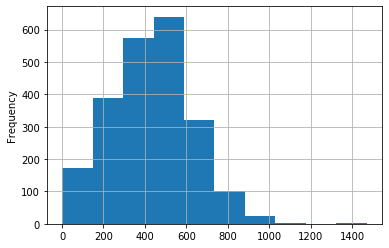

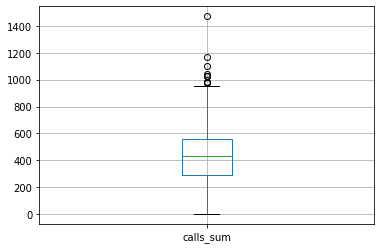

           ------------ MESSAGES_COUNT ------------            


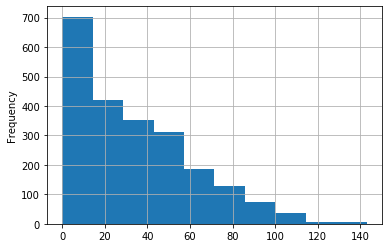

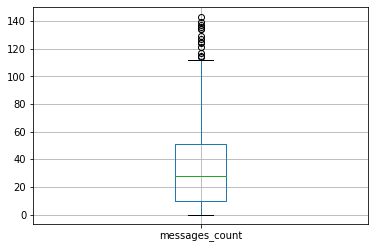

           ------------ INTERNET_MB_SUM ------------            


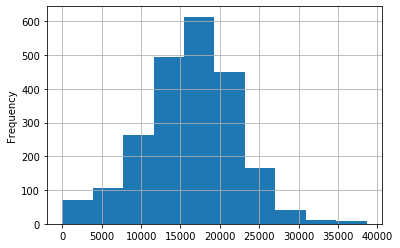

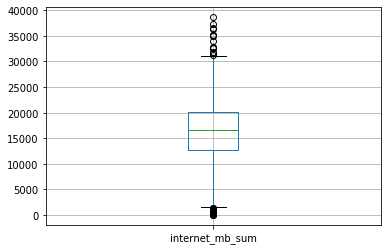

------------------------- ULTRA -------------------------
           ------------ CALLS_SUM ------------            


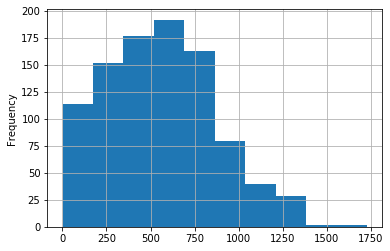

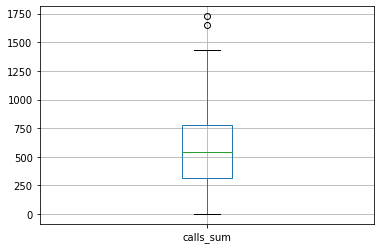

           ------------ MESSAGES_COUNT ------------            


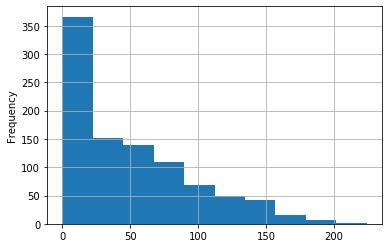

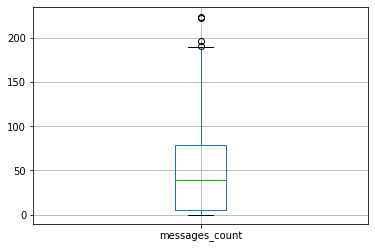

           ------------ INTERNET_MB_SUM ------------            


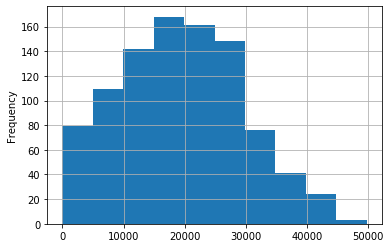

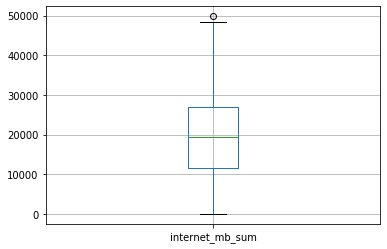

In [45]:
for tarif in ['smart', 'ultra']:
    print('-------------------------', tarif.upper(), '-------------------------')
    for data in ['calls_sum', 'messages_count', 'internet_mb_sum']:
        print('           ------------', data.upper(), '------------            ')
        users_details[users_details['tariff'] == tarif][data].plot(kind='hist', grid=True)
        plt.show()
        users_details[users_details['tariff'] == tarif][[data]].boxplot()
        plt.show()

In [46]:
users_details_clear = (users_details
                       .query('(tariff == "smart" and calls_sum < 980 and messages_count < 115 and internet_mb_sum < 31000 and internet_mb_sum > 1500) or (tariff == "ultra" and calls_sum < 1450 and messages_count < 180 and internet_mb_sum < 49000)'))
users_details_clear

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76
...,...,...,...,...,...,...,...,...,...,...
3169,12,1494,426,62,0.0,17650.0,smart,550,447.27,997.27
3170,12,1495,1066,155,84.0,23451.0,ultra,1950,0.00,1950.00
3171,12,1496,533,80,51.0,20770.0,smart,550,1158.64,1708.64
3172,12,1497,558,71,17.0,19946.0,smart,550,1069.70,1619.70


Теперь ответим на сам вопрос.

Воспользуемся для этого groupby() и медианой

In [47]:
details_median = users_details_clear.groupby(['date', 'tariff']).median()[['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum']]
details_median

calls_count  calls_sum  messages_count  internet_mb_sum
date tariff                                                         
1    smart          23.0      184.0            16.0           7595.5
     ultra          51.0      399.0            32.0          14810.0
2    smart          43.0      272.0            20.0          12640.0
     ultra          25.0      174.0             5.5           7338.0
3    smart          59.0      420.0            23.0          15697.0
     ultra          56.5      420.5            18.5          18275.5
4    smart          52.0      386.0            29.0          14498.0
     ultra          63.0      495.0            18.0          16935.0
5    smart          59.0      444.0            30.0          16466.5
     ultra          76.5      547.0            23.5          19239.5
6    smart          60.0      415.0            28.0          16314.0
     ultra          69.0      498.0            27.0          19317.0
7    smart          58.0      426.0            29.0          15990.0
     ultra          80.0      595.0            38.0          20004.0
8    smart          62.0      445.0            28.0          16862.0
     ultra          74.0      531.0            40.0          18949.0
9    smart          61.0      448.0            30.0          16054.5
     ultra          77.0      550.0            46.0          19675.0
10   smart          61.0      440.0            30.5          17211.5
     ultra          75.0      548.5            47.0          20337.5
11   smart          60.0      441.0            28.0          17044.0
     ultra          80.0      566.0            43.0          17847.0
12   smart          64.0      479.0            29.0          17399.0
     ultra          84.0      606.0            52.0          21997.0

В таблице присутствуют дробные значения. Так как компания округляет все в большую сторону, то и мы округлим. Заодно переведем в int32.  

In [48]:
details_median = np.ceil(details_median)
details_median = details_median.astype('int32')
details_median

calls_count  calls_sum  messages_count  internet_mb_sum
date tariff                                                         
1    smart            23        184              16             7596
     ultra            51        399              32            14810
2    smart            43        272              20            12640
     ultra            25        174               6             7338
3    smart            59        420              23            15697
     ultra            57        421              19            18276
4    smart            52        386              29            14498
     ultra            63        495              18            16935
5    smart            59        444              30            16467
     ultra            77        547              24            19240
6    smart            60        415              28            16314
     ultra            69        498              27            19317
7    smart            58        426              29            15990
     ultra            80        595              38            20004
8    smart            62        445              28            16862
     ultra            74        531              40            18949
9    smart            61        448              30            16055
     ultra            77        550              46            19675
10   smart            61        440              31            17212
     ultra            75        549              47            20338
11   smart            60        441              28            17044
     ultra            80        566              43            17847
12   smart            64        479              29            17399
     ultra            84        606              52            21997

In [49]:
details_median.groupby('tariff').mean().round()

,calls_count,calls_sum,messages_count,internet_mb_sum
tariff,,,,
smart,55.0,400.0,27.0,15314.0
ultra,68.0,494.0,33.0,17894.0


Теперь мы знаем, сколько нужно пользователям каждый месяц. Пользователи разных тарифов, на удивление, за 2018 год в стеднем тратят практически равное количество интернет трафика(в нынешних реалиях два с потовиной гигабайта - это мало, особенно если учесть, что у пользователей ultra 30 Гб). Также сообщения отправляют почти одно и тоже число раз. А вот у звонков разница около 100 мин. Я считаю это достаточно существенно, так как для меня проговорить еще 100 мин - это пытка.

Посмотрим, как зависят наши данные от даты на графиках.

In [50]:
details_median = details_median.reset_index()
details_median.head()

,date,tariff,calls_count,calls_sum,messages_count,internet_mb_sum
0,1,smart,23,184,16,7596
1,1,ultra,51,399,32,14810
2,2,smart,43,272,20,12640
3,2,ultra,25,174,6,7338
4,3,smart,59,420,23,15697


-------------------------------------------------- CALLS_COUNT --------------------------------------------------
корреляция smart 0.7307475471255382
корреляция ultra 0.7962819732896487


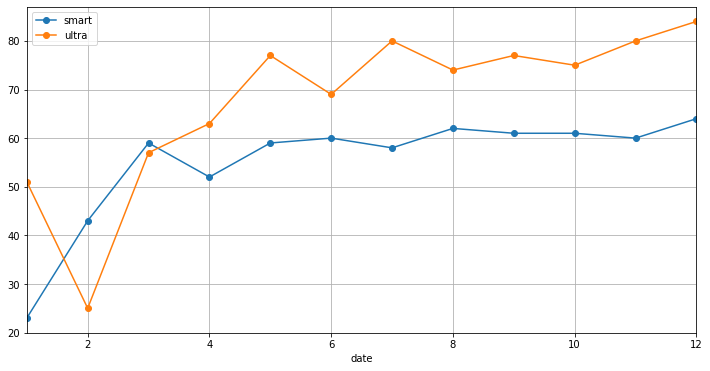

-------------------------------------------------- CALLS_SUM --------------------------------------------------
корреляция smart 0.7715800868646973
корреляция ultra 0.7459829223642385


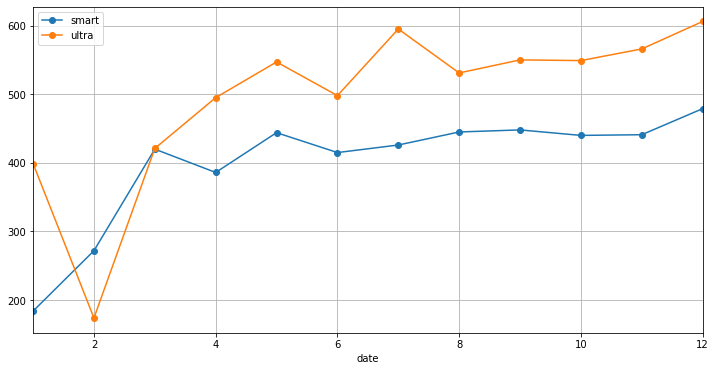

-------------------------------------------------- MESSAGES_COUNT --------------------------------------------------
корреляция smart 0.7403404467762061
корреляция ultra 0.8515580758443737


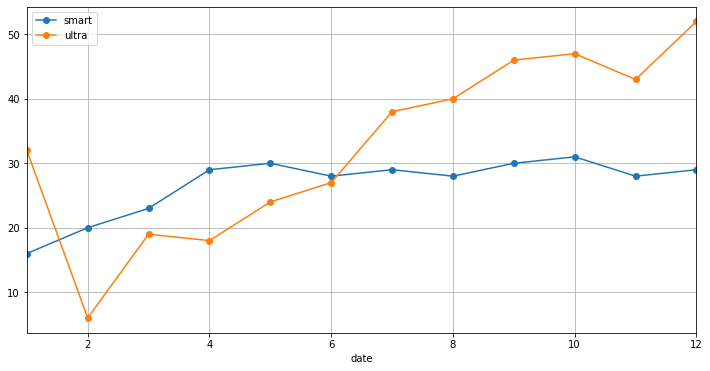

-------------------------------------------------- INTERNET_MB_SUM --------------------------------------------------
корреляция smart 0.7596642220880272
корреляция ultra 0.6718533708047739


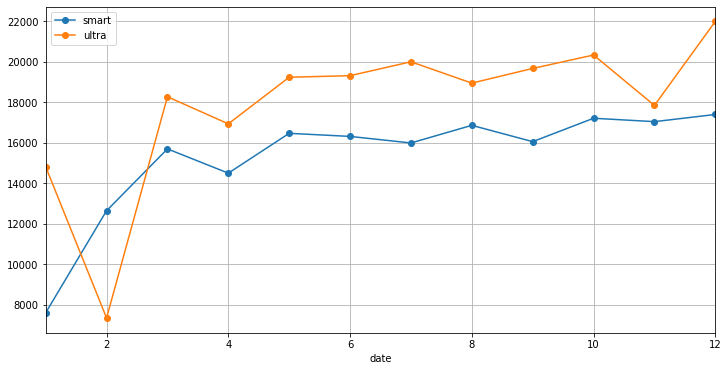

In [51]:
for data in ['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum']:
    print('--------------------------------------------------', data.upper(), '--------------------------------------------------')
    ax = (details_median[details_median['tariff']=='smart']
    .plot(kind='line', x='date', y=data, grid=True, figsize = (14,7), style='-o'))
    (details_median[details_median['tariff']=='ultra']
    .plot(ax=ax, kind='line', x='date', y=data, grid=True, figsize = (12,6), style='-o')
    .legend(['smart','ultra']))
    print('корреляция smart', details_median[details_median['tariff']=='smart']['date'].corr(details_median[data]))
    print('корреляция ultra', details_median[details_median['tariff']=='ultra']['date'].corr(details_median[data]))
    plt.show()

Все пользователи из выборки пришло к нам в 2018 году, а ушедших очень мало. Можно сделать вывод, что клиентская база растет. Также в тарифе ultra прослеживаются пики и провалы. Все же, я считаю, это вызвано малым количеством данных. Но можно сказать, что в 3 месяце была какая-то акция по привлечению клиентов в тариф ultra. Также можно сказать, что пользователи smart потребляют меньше, а пользователи ultra практически не используют все возможности тарифа.

In [52]:
users_details_clear[['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum', 'revenue', 'additional_revenue']]

,calls_count,calls_sum,messages_count,internet_mb_sum,revenue,additional_revenue
0,15,99,7.0,2730.0,550.00,0.00
1,61,397,38.0,24158.0,2268.36,1718.36
2,1,9,5.0,2348.0,550.00,0.00
3,64,568,30.0,17115.0,1096.77,546.77
4,24,200,16.0,15625.0,601.76,51.76
...,...,...,...,...,...,...
3169,62,426,0.0,17650.0,997.27,447.27
3170,155,1066,84.0,23451.0,1950.00,0.00
3171,80,533,51.0,20770.0,1708.64,1158.64
3172,71,558,17.0,19946.0,1619.70,1069.70


Посчитайтаем среднее количество,дисперсию и стандартное отклонение.

Среднее количество:

In [53]:
data_smart_mean = users_details_clear[['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum', 'revenue', 'additional_revenue']][users_details_clear['tariff']=='smart'].mean()
data_ultra_mean = users_details_clear[['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum', 'revenue', 'additional_revenue']][users_details_clear['tariff']=='ultra'].mean()
data_mean = pd.DataFrame({'smart_mean':data_smart_mean, 'ultra_mean':data_ultra_mean})

data_mean

,smart_mean,ultra_mean
calls_count,58.538853,75.557447
calls_sum,429.949584,556.595745
messages_count,33.096670,47.744681
internet_mb_sum,16225.165125,19402.592553
revenue,1219.522017,2055.971330
additional_revenue,669.522017,105.971330


Дисперсия:

In [54]:
data_smart_var = pd.Series()
data_ultra_var = pd.Series()
for data in ['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum', 'revenue', 'additional_revenue']:
    data_smart_var[data] = np.var(users_details_clear[users_details_clear['tariff']=='smart'][data], ddof=1).round()
    data_ultra_var[data] = np.var(users_details_clear[users_details_clear['tariff']=='ultra'][data], ddof=1).round()
data_var = pd.DataFrame({'smart_var':data_smart_var, 'ultra_var':data_ultra_var})

data_var

,smart_var,ultra_var
calls_count,611.0,1749.0
calls_sum,34455.0,96085.0
messages_count,746.0,2029.0
internet_mb_sum,30168425.0,101188724.0
revenue,521012.0,119001.0
additional_revenue,521012.0,119001.0


Стандартное отклонение:

In [55]:
data_smart_std = pd.Series()
data_ultra_std = pd.Series()
for data in ['calls_count', 'calls_sum', 'messages_count', 'internet_mb_sum', 'revenue', 'additional_revenue']:
    data_smart_std[data] = np.std(users_details_clear[users_details_clear['tariff']=='smart'][data], ddof=1).round()
    data_ultra_std[data] = np.std(users_details_clear[users_details_clear['tariff']=='ultra'][data], ddof=1).round()
data_std = pd.DataFrame({'smart_std':data_smart_std, 'ultra_std':data_ultra_std})

data_std

,smart_std,ultra_std
calls_count,25.0,42.0
calls_sum,186.0,310.0
messages_count,27.0,45.0
internet_mb_sum,5493.0,10059.0
revenue,722.0,345.0
additional_revenue,722.0,345.0


Соберем все в одну таблицу.

In [56]:
data_attributes = data_mean.join([data_var,data_std])

data_attributes

,smart_mean,ultra_mean,smart_var,ultra_var,smart_std,ultra_std
calls_count,58.538853,75.557447,611.0,1749.0,25.0,42.0
calls_sum,429.949584,556.595745,34455.0,96085.0,186.0,310.0
messages_count,33.096670,47.744681,746.0,2029.0,27.0,45.0
internet_mb_sum,16225.165125,19402.592553,30168425.0,101188724.0,5493.0,10059.0
revenue,1219.522017,2055.971330,521012.0,119001.0,722.0,345.0
additional_revenue,669.522017,105.971330,521012.0,119001.0,722.0,345.0


Все данные посчитаны и можно двигаться дальше.

Теперь построим гистограммы.

------------------------- SMART -------------------------


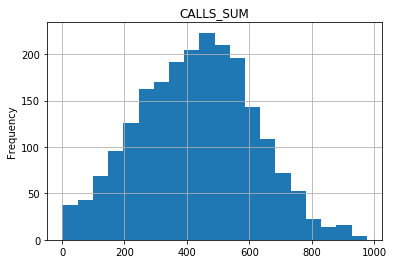

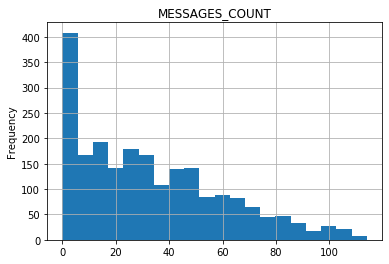

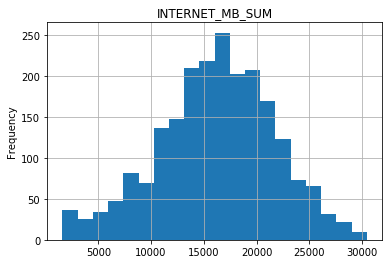

------------------------- ULTRA -------------------------


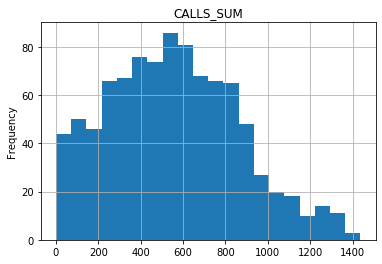

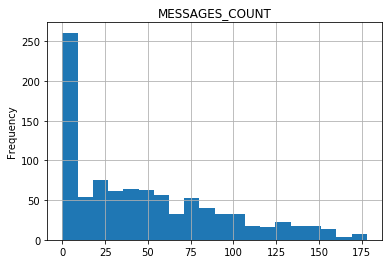

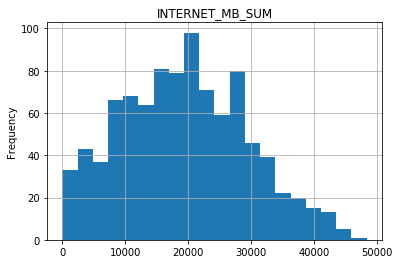

In [57]:
for tarif in ['smart', 'ultra']:
    print('-------------------------', tarif.upper(), '-------------------------')
       
    for data in [ 'calls_sum', 'messages_count', 'internet_mb_sum']:
        users_details_clear[users_details_clear['tariff'] == tarif][data].plot(kind='hist',bins=20, grid=True, title=data.upper())
        plt.show()

Гистограммы звонков и интернет трафика для тарифа smart выглядят как нормальное распределение, а вот гистограмма сообщений скошена вправо. С тарифом ultra, все немногно сложней - графики звонков и интернета отдаленно похожи на семетричный датасет, график же сообщений скошен вправо с пиком в 0. 


Здесь нужены графики плотности. С их помощью мы лучше поймем форму распределения.

------------------------- SMART -------------------------


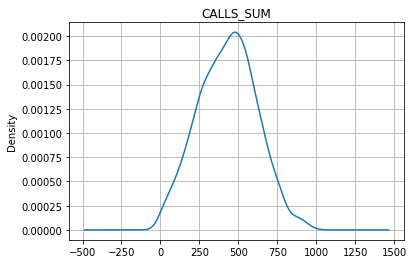

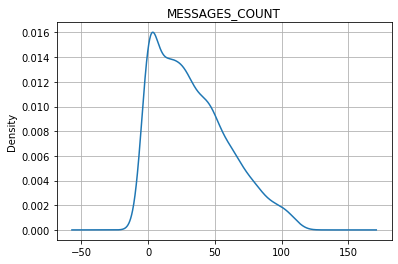

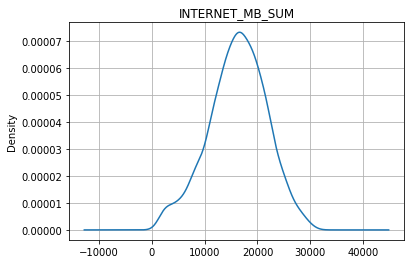

------------------------- ULTRA -------------------------


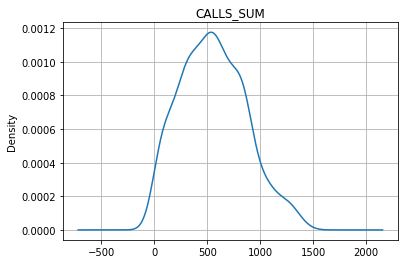

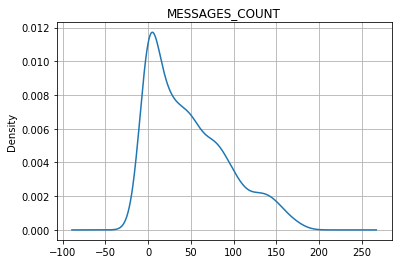

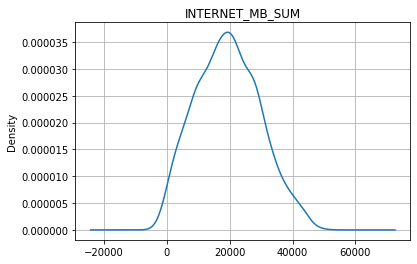

In [58]:
for tarif in ['smart', 'ultra']:
    print('-------------------------', tarif.upper(), '-------------------------')
       
    for data in [ 'calls_sum', 'messages_count', 'internet_mb_sum']:
        users_details_clear[users_details_clear['tariff'] == tarif][data].plot(kind='kde', grid=True, title=data.upper())
        plt.show()

Зная, как выглядит распределение основных параметров, можно переходить к следующему пункту.

### Вывод

По причине того, что в течение первых трех месяцев количество пользователей обоих тарифов активно росло, трудно явно выявить предпочтения пользователей в этит период. Однако дальше, когда рост замедлился, можно сказать, что:

### SMART
<div style="border:solid black 1px; padding: 20px">
    
  - Количество звонков держалось в районе 60;
  - люди не "проговаривали" примерно 1/4 от лимита;
  - количество сообщений в месяц держится около 30;
  - клиенты потребляют больше интернет трафика, чем в тарифе заявленно, и с каждым месяцем превышение все больше;
  - люди в среднем готовы доплачивать за дополнительный трафик даже больше, чем абонентская плата (670 руб. сверху);
  - в среднем людям нужно:  
    - 430 мин;
    - 34 SMS;
    - 17 Гб.

</div>

### ULTRA
<div style="border:solid black 1px; padding: 20px">
    
  - Количество звонков росло в течении всего периода;
  - длительность звонков в месяц растет, но составляет только 1/5 от общего лимита;
  - количество SMS растет, но по сравнению с лимитом, даже 50 сообщений в месяц это очень мало;
  - в среднем, интернетом пользователи ultra пользуются больше и потребление трафика увеличивается, но есть еще в запасе около 1/3 от лимита;
  - люди в среднем практически не переплачивают за доп. траффик (100 руб.), однако они не используют все возможности тарифа;
  - в среднем людям нужно:  
    - 560 мин;
    - 48 SMS;
    - 20 Гб.
    
</div>

Можно сказать, что большинству пользователей ultra лучше подошел бы тариф smart.
 

# Шаг 4. Проверьте гипотезы

Проверим следующие гипотезы: 
 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Начнем с выдвижения гипотез:

<div style="border:solid black 1px; padding: 20px">

- <b>H0</b>: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны между собой.
- <b>H1</b>: Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны между собой.

</div>

Н0 всегда формулируется так, чтобы использовать знак равенства.
Н1 формулируется как альтернативнвная гипотеза.

Для проверки гипотез будет найден p-value (уровень значимости). Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var). 

Проверим нулевую гипотезу.

In [59]:
from scipy import stats as st

In [60]:
users_details_clear.tail()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
3169,12,1494,426,62,0.0,17650.0,smart,550,447.27,997.27
3170,12,1495,1066,155,84.0,23451.0,ultra,1950,0.00,1950.00
3171,12,1496,533,80,51.0,20770.0,smart,550,1158.64,1708.64
3172,12,1497,558,71,17.0,19946.0,smart,550,1069.70,1619.70
3173,12,1499,505,69,66.0,13082.0,smart,550,63.00,613.00


In [61]:
# разделил на две таблицы для большей наглядности  
smart = users_details_clear[users_details_clear['tariff'] == 'smart']
ultra = users_details_clear[users_details_clear['tariff'] == 'ultra']

In [62]:
smart.head()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76


In [63]:
ultra.head()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
6,1,1120,56,5,0.0,657.0,ultra,1950,0.0,1950.0
7,1,1126,279,35,4.0,16378.0,ultra,1950,0.0,1950.0
11,1,1168,284,38,14.0,8165.0,ultra,1950,0.0,1950.0
19,1,1254,475,59,0.0,19708.0,ultra,1950,0.0,1950.0
28,1,1375,882,126,75.0,14564.0,ultra,1950,0.0,1950.0


In [64]:
alpha = .05
ttest_result_first_hipothesis = st.ttest_ind(smart['revenue'],ultra['revenue'],equal_var=True)

if ttest_result_first_hipothesis.pvalue > alpha:
    print('pvalue = ', ttest_result_first_hipothesis.pvalue,'\nГипотеза H0 не опровергнута')
else:
    print('pvalue = ', ttest_result_first_hipothesis.pvalue,'\nГипотеза H0 опровергнута')

pvalue =  2.220460262307735e-214 
Гипотеза H0 опровергнута


Нам удалось опровергнуть нулевую гипотезу, а значит гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается нам опровергнуть не удалось.

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

<div style="border:solid black 1px; padding: 20px">

- <b>H0</b>: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
- <b>H1</b>: Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

</div>

Для начала добавим города в таблицу.

In [65]:
users_details_clear.reset_index(drop=True)

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76
...,...,...,...,...,...,...,...,...,...,...
3097,12,1494,426,62,0.0,17650.0,smart,550,447.27,997.27
3098,12,1495,1066,155,84.0,23451.0,ultra,1950,0.00,1950.00
3099,12,1496,533,80,51.0,20770.0,smart,550,1158.64,1708.64
3100,12,1497,558,71,17.0,19946.0,smart,550,1069.70,1619.70


In [66]:
def city(user_id):
    for user, city in zip(users['user_id'], users['city']):
        if user_id == user:
            return city
        else:
            continue
            
users_details_clear.loc[:, ('city')] = users_details_clear['user_id'].apply(city)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [67]:
users_details_clear.head()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue,city
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00,Набережные Челны
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36,Ульяновск
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00,Улан-Удэ
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77,Казань
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76,Омск


Проверим гипотезу H0.

In [68]:
moscow_city = users_details_clear[users_details_clear['city'] == 'Москва']
other_cities = users_details_clear[users_details_clear['city'] != 'Москва']

In [69]:
users_details_clear

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue,city
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00,Набережные Челны
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36,Ульяновск
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00,Улан-Удэ
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77,Казань
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76,Омск
...,...,...,...,...,...,...,...,...,...,...,...
3169,12,1494,426,62,0.0,17650.0,smart,550,447.27,997.27,Омск
3170,12,1495,1066,155,84.0,23451.0,ultra,1950,0.00,1950.00,Иркутск
3171,12,1496,533,80,51.0,20770.0,smart,550,1158.64,1708.64,Вологда
3172,12,1497,558,71,17.0,19946.0,smart,550,1069.70,1619.70,Челябинск


In [70]:
moscow_city.head()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue,city
15,1,1204,314,50,0.0,15861.0,smart,550,97.85,647.85,Москва
19,1,1254,475,59,0.0,19708.0,ultra,1950,0.00,1950.00,Москва
23,1,1308,253,28,24.0,11988.0,smart,550,0.00,550.00,Москва
30,1,1381,399,59,32.0,14810.0,ultra,1950,0.00,1950.00,Москва
31,1,1385,274,34,72.0,19297.0,ultra,1950,0.00,1950.00,Москва


In [71]:
other_cities.head()

,date,user_id,calls_sum,calls_count,messages_count,internet_mb_sum,tariff,default_revenue,additional_revenue,revenue,city
0,1,1005,99,15,7.0,2730.0,smart,550,0.00,550.00,Набережные Челны
1,1,1032,397,61,38.0,24158.0,smart,550,1718.36,2268.36,Ульяновск
2,1,1045,9,1,5.0,2348.0,smart,550,0.00,550.00,Улан-Удэ
3,1,1055,568,64,30.0,17115.0,smart,550,546.77,1096.77,Казань
4,1,1071,200,24,16.0,15625.0,smart,550,51.76,601.76,Омск


In [72]:
moscow_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 15 to 3165
Data columns (total 11 columns):
date                  604 non-null int64
user_id               604 non-null int64
calls_sum             604 non-null int32
calls_count           604 non-null int64
messages_count        604 non-null float64
internet_mb_sum       604 non-null float64
tariff                604 non-null object
default_revenue       604 non-null int64
additional_revenue    604 non-null float64
revenue               604 non-null float64
city                  604 non-null object
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 54.3+ KB


In [73]:
ttest_result_second_hipothesis = st.ttest_ind(moscow_city['revenue'],other_cities['revenue'],equal_var=True)

if ttest_result_second_hipothesis.pvalue > alpha:
    print('pvalue = ', ttest_result_second_hipothesis.pvalue,'\nГипотеза H0 не опровергнута')
else:
    print('pvalue = ', ttest_result_second_hipothesis.pvalue,'\nГипотеза H0 опровергнута')

pvalue =  0.2293331437600411 
Гипотеза H0 не опровергнута


Мы не смогли опровергнуть нулевую гипотезу, а так как гипотеза H1 ей противоположна, то ее мы опровегнуть можем.

### Вывод

Проверив гипотезы, можно сделать выводы;

 1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - не опровергнута;
 2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - опровергнута.

# Шаг 5. Напишите общий вывод

Было проведено исследование "Определение перспективного тарифа для телеком компании" и сделаны следующие выводы:

### SMART
<div style="border:solid black 1px; padding: 20px">
    
  - Количество звонков держалось в районе 60;
  - люди не "проговаривали" примерно 1/4 от лимита;
  - количество сообщений в месяц держится около 30;
  - клиенты потребляют больше интернет трафика, чем в тарифе заявленно, и с каждым месяцем превышение все больше;
  - люди в среднем готовы доплачивать за дополнительный трафик даже больше, чем абонентская плата (670 руб. сверху);
  - в среднем людям нужно:  
    - 430 мин;
    - 34 SMS;
    - 17 Гб.

</div>

### ULTRA
<div style="border:solid black 1px; padding: 20px">
    
  - Количество звонков росло в течении всего периода;
  - длительность звонков в месяц растет, но составляет только 1/5 от общего лимита;
  - количество SMS растет, но по сравнению с лимитом, даже 50 сообщений в месяц это очень мало;
  - в среднем, интернетом пользователи ultra пользуются больше и потребление трафика увеличивается, но есть еще в запасе около 1/3 от лимита;
  - люди в среднем практически не переплачивают за доп. траффик (100 руб.), однако они не используют все возможности тарифа;
  - в среднем людям нужно:  
    - 560 мин;
    - 48 SMS;
    - 20 Гб.
    
</div>

Так же мы не смогли опровергли гипотезу о различии цены разных тарифов и опровергли гипотезу о том, что средняя выручка в москве больше.

Я считаю, что более перспективным тарифом является smart, так как пользователей значительно больше, и многие готовы доплачивать за дополнительные услуги.